<a href="https://colab.research.google.com/github/7777kuldeep/Hospital-management-system/blob/main/DL_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Single training step
def train_step(x1, x2, y, w1, w2, b, lr):
    # Forward pass
    z = w1*x1 + w2*x2 + b
    y_pred = sigmoid(z)

    # Backpropagation
    dz = y_pred - y          # BCE + Sigmoid shortcut
    dw1 = dz * x1
    dw2 = dz * x2
    db = dz

    # Update
    w1 -= lr * dw1
    w2 -= lr * dw2
    b  -= lr * db

    return w1, w2, b

# Inputs
x1, x2 = 0.6, 0.1
y = 1

# Parameters
w1, w2, b = 0.2, -0.3, 0.4
lr = 0.1

w1, w2, b = train_step(x1, x2, y, w1, w2, b, lr)

print("Updated Weights:", w1, w2)
print("Updated Bias:", b)


Updated Weights: 0.2227936140594146 -0.2962010643234309
Updated Bias: 0.437989356765691


In [2]:
import numpy as np

# Data (AND Gate)
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,0,0,1])

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training Function
def train(X, y, epochs=1000, lr=0.1):
    w = np.array([0.1, 0.2])
    b = 0.3

    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Gradient (BCE + Sigmoid shortcut)
            dz = y_pred - y[i]
            dw = dz * X[i]
            db = dz

            # Update
            w -= lr * dw
            b -= lr * db

    return w, b

# Train model
weights, bias = train(X, y)

print("Final Weights:", weights)
print("Final Bias:", bias)


Final Weights: [5.60154076 5.59544869]
Final Bias: -8.565987677634602


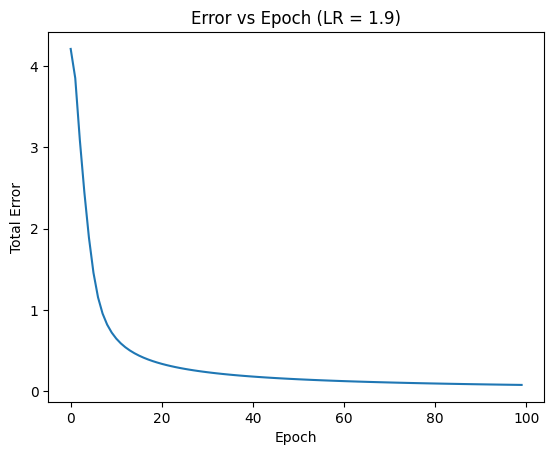

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# AND Gate Dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training function
def train_model(learning_rate, epochs=100):
    w = np.array([0.1, 0.2])
    b = 0.3
    errors = []

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Binary Cross Entropy Loss
            loss = -(y[i] * np.log(y_pred + 1e-9) +
                     (1 - y[i]) * np.log(1 - y_pred + 1e-9))

            total_error += loss

            # Gradient
            dz = y_pred - y[i]
            dw = dz * X[i]
            db = dz

            # Update weights
            w -= learning_rate * dw
            b -= learning_rate * db

        errors.append(total_error)

    return errors


# ---- ONLY MODIFICATION HERE ----
lr = 1.9  # change learning rate here
errors = train_model(lr)

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.title(f"Error vs Epoch (LR = {lr})")
plt.show()
